In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import UnivariateSpline
from google.colab import drive
import glob
drive.mount('/content/drive')
interesting_files = glob.glob("/content/drive/MyDrive/Grid Test Simulator Results/*resultsSNP.csv")
print(interesting_files) 
df = pd.concat((pd.read_csv(f, header = 0, sep = '\t') for f in interesting_files))
interesting_files2 = glob.glob("/content/drive/MyDrive/Grid Test Simulator Results/*resultsSV.csv") 
df2 = pd.concat((pd.read_csv(f, header = 0, sep = '\t') for f in interesting_files2))
#df = pd.read_csv('/content/drive/MyDrive/Grid Test Simulator Results/newgrid0_resultsSNP.csv', sep = '\t')

Mounted at /content/drive
['/content/drive/MyDrive/Grid Test Simulator Results/grid_0328_0_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/coverage0_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/newgrid0_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/simulation_grid_search_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/anothergrid0_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/anothergrid2_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/anothergrid4_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/anothergrid5_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/anothergrid6_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/anothergrid7_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/grid_0330220_resultsSNP.csv', '/content/drive/MyDrive/Grid Test Simulator Results/grid_033122_0_res

In [ ]:
df["Recall"] = (df["true_positive"]/(df["true_positive"]+df["missed_mutation"]))
df["F1"] = (df["true_positive"]/(df["true_positive"] + 0.5*(df["false_positive"] + df["missed_mutation"])))
new_df = df.loc[df['num_leaves'] == -1]
new_df2 = df2.loc[df2['num_leaves'] == -1]
df = df.drop(df[df["num_leaves"] == -1].index)
df2 = df2.drop(df2[df2["num_leaves"] == -1].index)
df2['sv_met'] = (df2['aggregate_tumor']+df2['del metric'])/2
new_df2['sv_met'] = (new_df2['del metric'] + new_df2['inv metric'])/2
df2

,Unnamed: 0,num_leaves,dir_conc,cell_pop,coverage,num_single_cells,read_len,frag_len,paired,exome,poisson_time,error_rate,tumor_num,sample_num,aggregate_tumor,del metric,inv metric,sv_met
0,0,5,10,800000000.0,30,0,2000,3000,True,False,2.203056e+10,0.00100,0,0,0.431113,0.014957,NaN,0.223035
2,2,5,10,800000000.0,30,0,2000,3000,True,True,2.203056e+10,0.00000,0,2,0.233065,0.014957,NaN,0.124011
3,3,5,10,800000000.0,5,0,500,1000,True,False,2.203056e+10,0.00010,0,3,0.237137,0.376015,NaN,0.306576
4,4,5,10,800000000.0,2,0,2000,3000,True,True,2.203056e+10,0.00000,0,4,0.118217,0.014957,NaN,0.066587
0,0,5,10,800000000.0,2,0,125,200,True,False,1.422499e+10,0.00000,0,0,0.000000,0.000000,NaN,0.000000
2,2,5,10,800000000.0,5,0,125,200,True,False,1.422499e+10,0.00000,0,2,0.000000,0.000000,NaN,0.000000
3,3,5,10,800000000.0,5,0,125,200,True,False,1.422499e+10,0.00000,0,3,0.000000,0.000000,NaN,0.000000
4,4,5,10,800000000.0,10,0,125,200,True,False,1.422499e+10,0.00000,0,4,0.000000,0.000000,NaN,0.000000
0,0,5,10,800000000.0,15,0,150,200,True,True,1.755984e+10,0.00100,0,0,0.247561,0.559252,NaN,0.403407
2,2,5,10,800000000.0,15,0,150,200,True,True,1.755984e+10,0.00010,0,2,0.247561,0.559252,NaN,0.403407


In [ ]:
averaged_df = df.groupby(['coverage'], as_index=False).mean()
averaged_df = averaged_df.drop(averaged_df[averaged_df["num_leaves"] == -1].index)
averaged_df

,coverage,Unnamed: 0,num_leaves,dir_conc,cell_pop,num_single_cells,read_len,frag_len,poisson_time,error_rate,tumor_num,sample_num,aggregate_tumor,true_positive,false_positive,missed_mutation,Recall,F1
0,2,3.727273,5.0,10.0,800000000.0,0.181818,613.636364,1022.727273,1.290001e+10,0.000202,0.181818,2.181818,-1.0,54.272727,25406.363636,1043.454545,0.040736,0.035567
1,5,3.833333,5.0,10.0,800000000.0,0.000000,316.666667,600.000000,1.428116e+10,0.000035,0.166667,2.500000,-1.0,339.500000,52.666667,784.666667,0.162556,0.234633
2,10,3.600000,5.0,10.0,800000000.0,0.000000,205.000000,365.000000,9.144619e+09,0.000113,0.200000,1.800000,-1.0,304.700000,19662.900000,696.400000,0.196267,0.178597
3,15,6.666667,5.0,10.0,800000000.0,0.111111,697.222222,1127.777778,1.226558e+10,0.000137,0.333333,3.777778,-1.0,16.444444,1776.000000,705.000000,0.013080,0.017377
4,25,5.000000,5.0,10.0,800000000.0,0.000000,812.500000,1258.333333,9.892205e+09,0.000172,0.166667,3.666667,-1.0,18.000000,213.833333,513.333333,0.195320,0.141105
5,30,3.307692,5.0,10.0,800000000.0,0.076923,657.692308,1042.307692,1.221416e+10,0.000617,0.153846,2.000000,-1.0,21.923077,314616.846154,363.615385,0.176802,0.032594


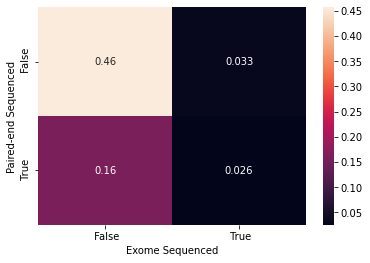

In [ ]:
averaged_df = df.groupby(['paired', 'exome'], as_index=False).mean()
averaged_df = averaged_df.drop(averaged_df[averaged_df["num_leaves"] == -1].index)
averaged_df
pivot = averaged_df.pivot(index='paired', columns='exome', values='F1')
ax = sns.heatmap(pivot,annot=True)
plt.xlabel("Exome Sequenced")
plt.ylabel("Paired-end Sequenced")
plt.show()

Text(0.5, 1.0, 'Effect of error rate on Variant Calling')

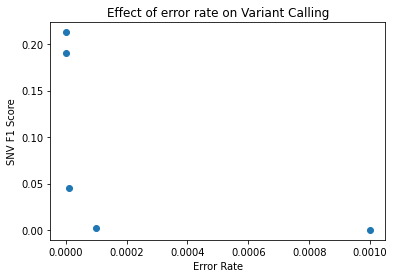

In [ ]:
averaged_df = df.groupby(['error_rate'], as_index=False).mean()
averaged_df = averaged_df.drop(averaged_df[averaged_df["num_leaves"] == -1].index)
plt.scatter(averaged_df
["error_rate"], averaged_df["F1"])
plt.xlabel("Error Rate")
plt.ylabel("SNV F1 Score")
plt.title("Effect of error rate on Variant Calling")

In [ ]:
averaged_df = df.groupby(['paired', 'exome', 'coverage', 'error_rate'], as_index=False).mean()
averaged_df.iloc[averaged_df['Recall'].idxmax()] 
averaged_df.iloc[averaged_df['F1'].idxmax()] 

paired                          True
exome                          False
coverage                          25
error_rate                       0.0
Unnamed: 0                      12.0
num_leaves                       5.0
dir_conc                        10.0
cell_pop                 800000000.0
num_single_cells                 0.0
read_len                      2000.0
frag_len                      3000.0
poisson_time        8910128466.74147
tumor_num                        1.0
sample_num                       4.0
aggregate_tumor                 -1.0
true_positive                   63.0
false_positive                   3.0
missed_mutation                 35.0
Recall                      0.642857
F1                          0.768293
Name: 18, dtype: object

Text(0.5, 1.0, 'Effect of RL on DEL RECOV')

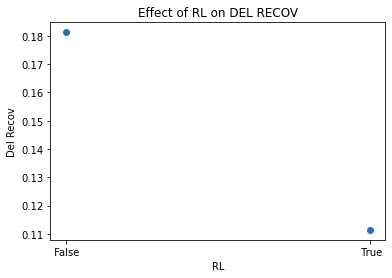

In [ ]:
averaged_df = df2.groupby(['exome'], as_index=False).mean()
plt.scatter(averaged_df
["exome"], averaged_df["del metric"])
plt.xlabel("RL")
plt.ylabel("Del Recov")
plt.title("Effect of RL on DEL RECOV")

In [ ]:
print(new_df['F1'].mean())
print(df['F1'].mean())

0.05094814809029137
0.08950290374676434


In [ ]:
merged_df = df2.merge(df, how = 'inner', on = ['coverage', 'error_rate', 'exome', 'read_len'])
merged_df

,Unnamed: 0_x,num_leaves_x,dir_conc_x,cell_pop_x,coverage,num_single_cells_x,read_len,frag_len_x,paired_x,exome,...,paired_y,poisson_time_y,tumor_num_y,sample_num_y,aggregate_tumor_y,true_positive,false_positive,missed_mutation,Recall,F1
0,0,5,10,800000000.0,30,0,2000,3000,True,False,...,True,2.203056e+10,0,0,-1,47,1268586,21,0.691176,0.000074
1,2,5,10,800000000.0,30,0,2000,3000,True,True,...,True,2.203056e+10,0,2,-1,7,51,61,0.102941,0.111111
2,2,5,10,800000000.0,30,0,2000,3000,True,True,...,True,1.170696e+10,0,0,-1,9,5,50,0.152542,0.246575
3,0,5,10,800000000.0,30,0,2000,3000,True,True,...,True,2.203056e+10,0,2,-1,7,51,61,0.102941,0.111111
4,0,5,10,800000000.0,30,0,2000,3000,True,True,...,True,1.170696e+10,0,0,-1,9,5,50,0.152542,0.246575
5,3,5,10,800000000.0,5,0,500,1000,True,False,...,True,2.203056e+10,0,3,-1,0,75,68,0.000000,0.000000
6,3,5,10,800000000.0,5,0,500,1000,True,False,...,True,8.910128e+09,1,5,-1,0,51,98,0.000000,0.000000
7,13,5,10,800000000.0,5,0,500,1000,True,False,...,True,2.203056e+10,0,3,-1,0,75,68,0.000000,0.000000
8,13,5,10,800000000.0,5,0,500,1000,True,False,...,True,8.910128e+09,1,5,-1,0,51,98,0.000000,0.000000
9,4,5,10,800000000.0,2,0,2000,3000,True,True,...,True,2.203056e+10,0,4,-1,6,64,62,0.088235,0.086957


In [ ]:
import math
ordered_list_of_prefixes = ['grid_0328_0','grid_0330220', 'grid_033122_0','rs2_0402220','rs2_0404220', 'rs2_0405220', 'newgrid0','coverage0', 'anothergrid0', 'anothergrid2', 'anothergrid4', 'anothergrid5', 'anothergrid6', 'anothergrid7']
alphas = [0.4]*14
fulldf = pd.DataFrame()
count = 0
def categorise(row, alpha):  
    if row['Recall'] > 0.1 and row['sv_met'] > 0.1:
        return alpha*(0.75*(row["Recall"])+0.25*(row["F1"])) + (alpha)*row["sv_met"] + (1-2*alpha)
    else:
        return alpha*(0.75*(row["Recall"])+0.25*(row["F1"])) + (alpha)*row["sv_met"]
for i in ordered_list_of_prefixes:
  df = pd.read_csv('/content/drive/MyDrive/Grid Test Simulator Results/{}_resultsSNP.csv'.format(i), sep = '\t')
  df2 = pd.read_csv('/content/drive/MyDrive/Grid Test Simulator Results/{}_resultsSV.csv'.format(i), sep = '\t')
  df = df.drop(df[df["num_leaves"] == -1].index)
  df2 = df2.drop(df2[df2["num_leaves"] == -1].index)
  df.drop('Unnamed: 0', axis=1, inplace=True)
  df.drop('poisson_time', axis=1, inplace=True)
  df.drop('num_leaves', axis=1, inplace=True)
  df.drop('cell_pop', axis=1, inplace=True)
  df.drop('paired', axis=1, inplace=True)
  df.drop('dir_conc', axis=1, inplace = True)
  df2.drop('Unnamed: 0', axis=1, inplace=True)
  df2.drop('poisson_time', axis=1, inplace=True)
  df2.drop('num_leaves', axis=1, inplace=True)
  df2.drop('cell_pop', axis=1, inplace=True)
  df2.drop('paired', axis=1, inplace=True)
  df2.drop('dir_conc', axis=1, inplace=True)
  df["Recall"] = (df["true_positive"]/(df["true_positive"]+df["missed_mutation"]))
  df["F1"] = (df["true_positive"]/(df["true_positive"] + 0.5*(df["false_positive"] + df["missed_mutation"])))
  if(not math.isnan(df2["inv metric"][0])):
    df2['sv_met'] = (df2['inv metric']+df2['del metric'])/2
  else:
    df2['sv_met'] = (df2['aggregate_tumor']+df2['del metric'])/2
  df2.drop("aggregate_tumor", axis=1, inplace=True)
  df.drop("aggregate_tumor", axis=1, inplace=True)
  totaldf = pd.merge(df, df2, on=["coverage", "num_single_cells", "read_len", "frag_len","tumor_num", "sample_num", "exome", "error_rate"])
  alpha = alphas[count]
  if(not math.isnan(totaldf["Recall"][0])):
    avg_snv = (totaldf["Recall"]+totaldf["F1"])/2
    avg_sv = totaldf["sv_met"]/2
    totaldf['score'] = totaldf.apply(lambda row: categorise(row, alpha), axis=1)
    #totaldf['score'] = alpha*(0.75*(totaldf["Recall"])+0.25*(totaldf["F1"])) + (1-alpha)*totaldf["sv_met"]
  else: 
    totaldf['score'] = totaldf['sv_met']
  fulldf = pd.concat([fulldf, totaldf])
  count += 1

In [ ]:
final_df = fulldf.sort_values(by=['score'], ascending=False)
final_df.drop("num_single_cells", axis=1, inplace=True)
final_df

,coverage,read_len,frag_len,exome,error_rate,tumor_num,sample_num,true_positive,false_positive,missed_mutation,Recall,F1,del metric,inv metric,sv_met,score
11,25,2000,3000,False,0.0000,1,4,63,3,35,0.642857,0.768293,0.588545,0.000000,0.294273,0.587395
0,30,2000,3000,False,0.0010,0,0,47,1268586,21,0.691176,0.000074,0.014957,NaN,0.223035,0.496574
7,10,2000,3000,False,0.0000,0,7,41,10,82,0.333333,0.471264,0.138144,0.083398,0.110771,0.391435
2,30,2000,3000,True,0.0000,0,2,7,51,61,0.102941,0.111111,0.014957,NaN,0.124011,0.291598
1,30,2000,3000,True,0.0000,0,1,7,54,61,0.102941,0.108527,0.014957,NaN,0.124011,0.291339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,25,2000,3000,True,0.0000,0,1,0,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,15,150,200,False,0.0001,0,5,0,2560,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,10,150,200,True,0.0000,0,3,0,0,0,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,15,150,200,False,0.0000,0,1,0,0,0,NaN,NaN,0.000000,0.000000,0.000000,0.000000


In [ ]:
print(final_df.shape)

(75, 16)


In [ ]:
final_averaged_df = final_df.groupby(['coverage', 'read_len', 'frag_len', 'exome', 'error_rate'])

In [ ]:
zed = final_averaged_df.mean().sort_values(by = 'score', ascending = False)
zed

tumor_num  sample_num  \
coverage read_len frag_len exome  error_rate                          
25       2000     3000      False 0.00000           1.0         4.0   
30       2000     3000      False 0.00100           0.0         0.0   
10       2000     3000      False 0.00000           0.0         7.0   
25       150      200       False 0.00000           0.0         1.0   
         500      1000      False 0.00010           0.0         6.0   
...                                                 ...         ...   
15       150      200       False 0.00010           0.0         5.0   
                                  0.00000           0.0         1.0   
         500      1000      False 0.00010           0.0         6.0   
10       150      200       True  0.00000           0.0         3.0   
15       150      200       True  0.00001           1.0         6.0   

                                              true_positive  false_positive  \
coverage read_len frag_len exome  error_rate                                  
25       2000     3000      False 0.00000              63.0             3.0   
30       2000     3000      False 0.00100              47.0       1268586.0   
10       2000     3000      False 0.00000              41.0            10.0   
25       150      200       False 0.00000              41.0            15.0   
         500      1000      False 0.00010               0.0             6.0   
...                                                     ...             ...   
15       150      200       False 0.00010               0.0          2560.0   
                                  0.00000               0.0             0.0   
         500      1000      False 0.00010               0.0           106.0   
10       150      200       True  0.00000               0.0             0.0   
15       150      200       True  0.00001               0.0          1770.0   

                                              missed_mutation    Recall  \
coverage read_len frag_len exome  error_rate                              
25       2000     3000      False 0.00000                35.0  0.642857   
30       2000     3000      False 0.00100                21.0  0.691176   
10       2000     3000      False 0.00000                82.0  0.333333   
25       150      200       False 0.00000                17.0  0.706897   
         500      1000      False 0.00010              1514.0  0.000000   
...                                                       ...       ...   
15       150      200       False 0.00010                 0.0       NaN   
                                  0.00000                 0.0       NaN   
         500      1000      False 0.00010                 2.0  0.000000   
10       150      200       True  0.00000                 0.0       NaN   
15       150      200       True  0.00001                98.0  0.000000   

                                                    F1  del metric  \
coverage read_len frag_len exome  error_rate                         
25       2000     3000      False 0.00000     0.768293    0.588545   
30       2000     3000      False 0.00100     0.000074    0.014957   
10       2000     3000      False 0.00000     0.471264    0.138144   
25       150      200       False 0.00000     0.719298    0.000000   
         500      1000      False 0.00010     0.000000    0.625397   
...                                                ...         ...   
15       150      200       False 0.00010     0.000000    0.000000   
                                  0.00000          NaN    0.000000   
         500      1000      False 0.00010     0.000000    0.000000   
10       150      200       True  0.00000          NaN    0.000000   
15       150      200       True  0.00001     0.000000    0.000000   

                                              inv metric    sv_met     score  
coverage read_len frag_len exome  error_rate                                  
25       2000     3000      False 0.00000       0

    exome tumor_num                  sample_num                   \
               mean median       var       mean median       var   
0   False  0.064516    0.0  0.045699   3.091398    2.5  6.042294   
1    True  0.112903    0.0  0.095161   3.532258    3.5  6.232258   

  true_positive                        ... del metric inv metric           \
           mean median            var  ...        var       mean   median   
0    210.569892   16.0  214819.395878  ...   0.042145   0.159593  0.06816   
1      4.827957    0.0     308.056452  ...   0.037179   0.034987  0.00000   

               sv_met                         score                      
        var      mean    median       var      mean    median       var  
0  0.046176  0.144661  0.030325  0.037654  0.165889  0.149672  0.017274  
1  0.005823  0.097487  0.029503  0.019517  0.051252  0.018933  0.004369  

[2 rows x 34 columns]


Text(0.5, 1.0, 'Exon Sequencing versus Score')

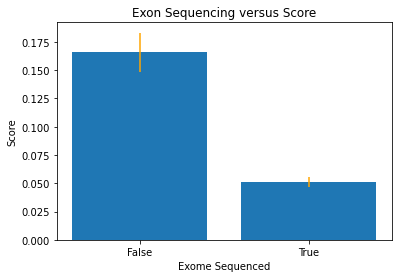

In [ ]:
exon = zed.groupby('exome').agg(["mean", "median", "var"]).reset_index()
print(exon)
x = ['False', 'True']
#y = [0.064099 ,0.153262]
y = exon['score']['mean'].values
variances = exon['score']['var'].values
plt.bar(x,y)
plt.errorbar(x = x, y = y, yerr=variances, ls = 'None', color = 'orange')

plt.xlabel('Exome Sequenced')
plt.ylabel('Score')
plt.title('Exon Sequencing versus Score')

Text(0.5, 1.0, 'Coverage versus Score')

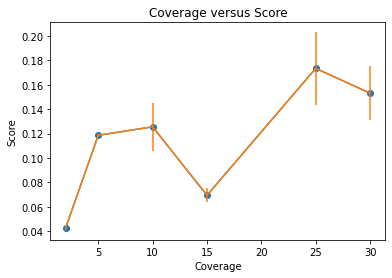

In [ ]:
coverage = zed.groupby('coverage').agg(["mean", "median", "var"]).reset_index()
x = [2,5,10,15,25,30]
y = coverage['score']['mean'].values
variances = coverage['score']['var'].values
plt.scatter(x,y)
plt.plot(x,y)
plt.errorbar(x = x, y = y, yerr=variances)
plt.xlabel('Coverage')
plt.ylabel('Score')
plt.title('Coverage versus Score')

  read_len tumor_num                  sample_num                   \
                mean median       var       mean median       var   
0       75  0.000000    0.0  0.000000   2.950000    2.0  9.691667   
1      125  0.000000    0.0  0.000000   3.366667    4.0  2.588889   
2      150  0.190476    0.0  0.136905   2.952381    3.0  5.722619   
3      500  0.033333    0.0  0.016667   4.333333    4.0  6.202381   
4     2000  0.090909    0.0  0.090909   2.909091    4.0  5.090909   

  true_positive                         ... del metric inv metric            \
           mean  median            var  ...        var       mean    median   
0      2.900000     0.0      35.211111  ...   0.029890   0.024007  0.000000   
1   1215.033333  1271.0  103714.172222  ...   0.000000        NaN       NaN   
2     12.857143     1.0     539.103571  ...   0.030090   0.009266  0.000000   
3      0.000000     0.0       0.000000  ...   0.045052   0.305668  0.333559   
4     27.560606    16.0     967.957071  ..

Text(0.5, 1.0, 'Read Length versus Score')

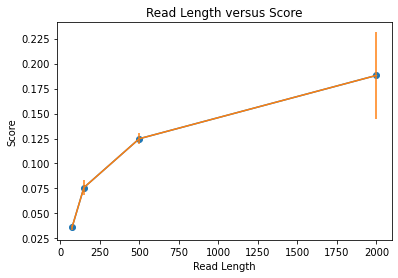

In [ ]:
rl = zed.groupby('read_len').agg(["mean", "median", "var"]).reset_index()
print(rl)
x = [75,150,500,2000]
y = list(rl['score']['mean'].values)
variances = list(rl['score']['var'].values)
del y[1]
del variances[1]
plt.scatter(x,y)
plt.plot(x,y)
plt.errorbar(x = x, y = y, yerr=variances)

plt.xlabel('Read Length')
plt.ylabel('Score')
plt.title('Read Length versus Score')

  error_rate tumor_num                  sample_num                   \
                  mean median       var       mean median       var   
0    0.00000  0.043478    0.0  0.043478   3.557971    4.0  5.107598   
1    0.00001  0.058824    0.0  0.058824   3.647059    3.5  7.836397   
2    0.00010  0.111111    0.0  0.048611   3.333333    3.0  4.000000   
3    0.00100  0.192308    0.0  0.147436   2.423077    1.5  7.326923   

  true_positive                           ... del metric inv metric            \
           mean    median            var  ...        var       mean    median   
0    273.579710  7.666667  276518.136034  ...   0.022391   0.069073  0.000000   
1      8.117647  0.000000     555.985294  ...   0.048904   0.182531  0.083398   
2      1.722222  0.000000      16.194444  ...   0.047976   0.009656  0.000000   
3     17.807692  0.000000     827.314103  ...   0.051872   0.106367  0.000000   

               sv_met                         score                      
        var 

Text(0.5, 1.0, 'Error Rate versus Score')

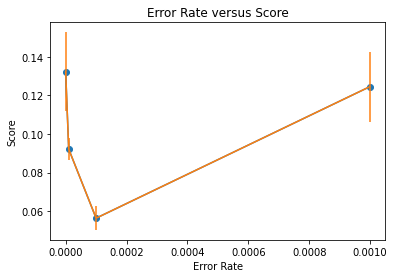

In [ ]:
#er = zed.groupby('error_rate').mean()
er = zed.groupby('error_rate').agg(["mean", "median", "var"]).reset_index()
print(er)
x = [0.0, 0.00001, 0.0001, 0.001]
y = er['score']['mean'].values
variances = er['score']['var'].values
plt.scatter(x,y)
plt.plot(x,y)
plt.errorbar(x = x, y = y, yerr=variances)
plt.xlabel('Error Rate')
plt.ylabel('Score')
plt.title('Error Rate versus Score')

  error_rate tumor_num                  sample_num                   \
                  mean median       var       mean median       var   
0    0.00000  0.043478    0.0  0.043478   3.557971    4.0  5.107598   
1    0.00001  0.058824    0.0  0.058824   3.647059    3.5  7.836397   
2    0.00010  0.111111    0.0  0.048611   3.333333    3.0  4.000000   
3    0.00100  0.192308    0.0  0.147436   2.423077    1.5  7.326923   

  true_positive                           ... del metric inv metric            \
           mean    median            var  ...        var       mean    median   
0    273.579710  7.666667  276518.136034  ...   0.022391   0.069073  0.000000   
1      8.117647  0.000000     555.985294  ...   0.048904   0.182531  0.083398   
2      1.722222  0.000000      16.194444  ...   0.047976   0.009656  0.000000   
3     17.807692  0.000000     827.314103  ...   0.051872   0.106367  0.000000   

               sv_met                         score                      
        var 

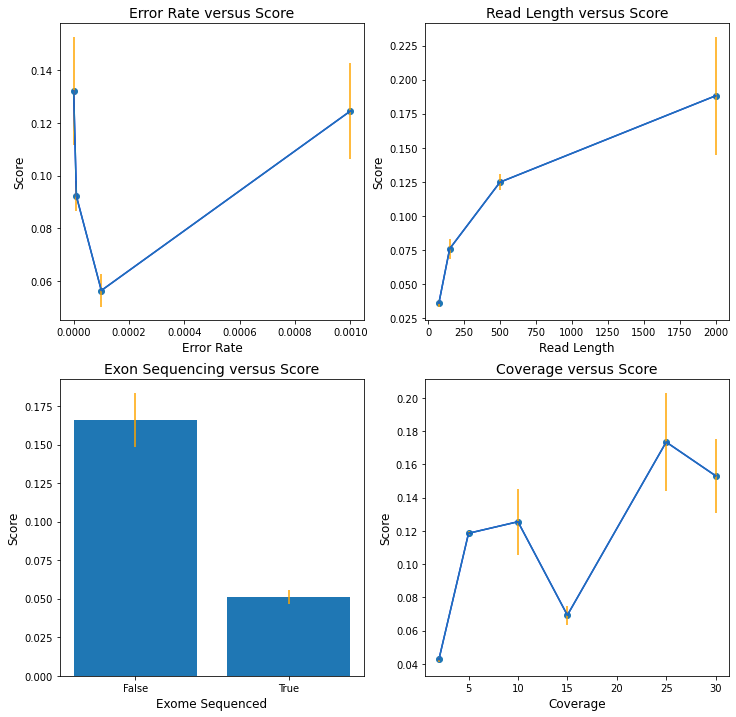

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))
er = zed.groupby('error_rate').agg(["mean", "median", "var"]).reset_index()
print(er)
x = [0.0, 0.00001, 0.0001, 0.001]
y = er['score']['mean'].values
variances = er['score']['var'].values
axs[0,0].scatter(x,y)
axs[0,0].plot(x,y,color = 'blue')
axs[0,0].errorbar(x = x, y = y, yerr=variances, ecolor = 'orange')
axs[0,0].set_xlabel('Error Rate', fontsize = 12)
axs[0,0].set_ylabel('Score', fontsize = 12)
axs[0,0].set_title('Error Rate versus Score', fontsize = 14)

rl = zed.groupby('read_len').agg(["mean", "median", "var"]).reset_index()
print(rl)
x = [75,150,500,2000]
y = list(rl['score']['mean'].values)
variances = list(rl['score']['var'].values)
del y[1]
del variances[1]

axs[0,1].scatter(x,y)
axs[0,1].plot(x,y, color = 'blue')
axs[0,1].errorbar(x = x, y = y, yerr=variances, ecolor = 'orange')
axs[0,1].set_xlabel('Read Length', fontsize = 12)
axs[0,1].set_ylabel('Score', fontsize = 12)
axs[0,1].set_title('Read Length versus Score', fontsize = 14)

coverage = zed.groupby('coverage').agg(["mean", "median", "var"]).reset_index()
x = [2,5,10,15,25,30]
y = coverage['score']['mean'].values
variances = coverage['score']['var'].values
axs[1,1].scatter(x,y)
axs[1,1].plot(x,y, color = 'blue')
axs[1,1].errorbar(x = x, y = y, yerr=variances, ecolor = 'orange')
axs[1,1].set_xlabel('Coverage', fontsize = 12)
axs[1,1].set_ylabel('Score', fontsize = 12)
axs[1,1].set_title('Coverage versus Score', fontsize = 14)

exon = zed.groupby('exome').agg(["mean", "median", "var"]).reset_index()
print(exon)
x = ['False', 'True']
#y = [0.064099 ,0.153262]
y = exon['score']['mean'].values
variances = exon['score']['var'].values
axs[1,0].bar(x,y)
axs[1,0].errorbar(x = x, y = y, yerr=variances, ls = 'None', color = 'orange')

axs[1,0].set_xlabel('Exome Sequenced', fontsize = 12)
axs[1,0].set_ylabel('Score', fontsize = 12)
axs[1,0].set_title('Exon Sequencing versus Score', fontsize = 14)
fig.tight_layout

fig.savefig('gridsearch.eps', format='eps')

# New Section